# IMPORT LIBRARIES

In [7]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# LOAD DATASET
df = pd.read_csv('C:/Users/ROHAN/Desktop/Data Analytics/1.IIM SKILLs/python/Python_Project/Retail and wherehouse Sale.csv')

In [10]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [11]:
df.shape

(30000, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [14]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [14]:
df.isnull()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

# DATA CLEANING

In [17]:
# DATA CLEANING

#FILLING MISSIMG SUPPLIER VALUES
df['SUPPLIER'] = df['SUPPLIER'].fillna("Unknown")

In [18]:
#FILLING MISSING RETAIL SALES VALUES
df['RETAIL SALES'] = df['RETAIL SALES'].fillna(0)

In [19]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [20]:
# FIND NUMBER OF DUBLICATED VALUES
df.duplicated().sum()

np.int64(0)

In [21]:
#NUMBER OF UNIQUE VALUES
df.nunique()

YEAR                    1
MONTH                   4
SUPPLIER              291
ITEM CODE           15668
ITEM DESCRIPTION    15732
ITEM TYPE               8
RETAIL SALES         3657
RETAIL TRANSFERS      542
WAREHOUSE SALES      1032
dtype: int64

In [22]:
# unique values in item type
df['ITEM TYPE'].unique()
df['ITEM TYPE'].value_counts()

ITEM TYPE
WINE            18680
LIQUOR           5995
BEER             4217
KEGS              808
NON-ALCOHOL       216
STR_SUPPLIES       63
DUNNAGE            13
REF                 8
Name: count, dtype: int64

In [23]:
# CREATE TOTAL SALES COLUMN
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

In [24]:
# CREATE YEAR_MONTH COLUMN
df['YEAR_MONTH'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str).str.zfill(2)

In [25]:
# CREATE SEASON COLUMN
def get_season(MONTH):
    if MONTH in [12,1,2]:
        return "WINTER"
    elif MONTH in [3,4,5]:
        return "SUMMER"
    elif MONTH in [6,7,8]:
        return "RAINY"
    else:
        return "OTHER"

df['SEASON'] = df['MONTH'].apply(get_season)

In [26]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,YEAR_MONTH,SEASON
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00,2020-01,WINTER
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00,2020-01,WINTER
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00,2020-01,WINTER
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00,2020-01,WINTER
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82,2020-01,WINTER


# EXPLORATORY DATA ANALYSIS (EDA)  
Understanding the dataset and finding actionable insights to support forecasting, inventory optimization and strategic planning.

Are our sales stable over time, and can we identify periods of growth or decline that need action?

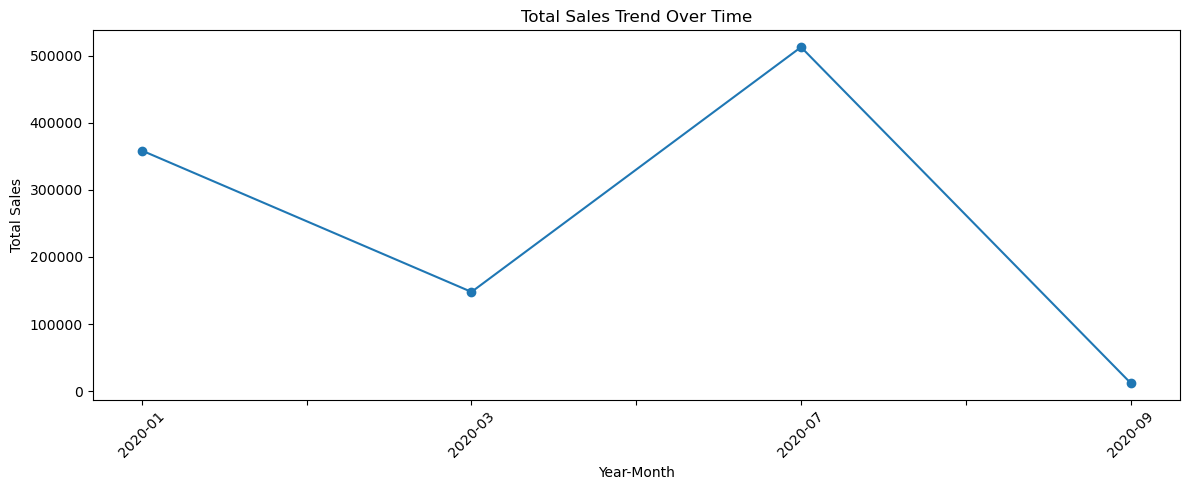

In [28]:
# SALES TREND OVER TIME

plt.figure(figsize=(12,5))
monthly_sales = df.groupby('YEAR_MONTH')['TOTAL SALES'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Total Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

⦁	The sales trend analysis reveals high volatility with a strong mid-period peak followed by a sharp decline, indicating unstable demand.  
⦁	This insight helps the business identify peak drivers, improve forecasting accuracy, and implement strategies to stabilize revenue across months.

Which season drives the most revenue, and how should we plan inventory, marketing, and operations season-wise?

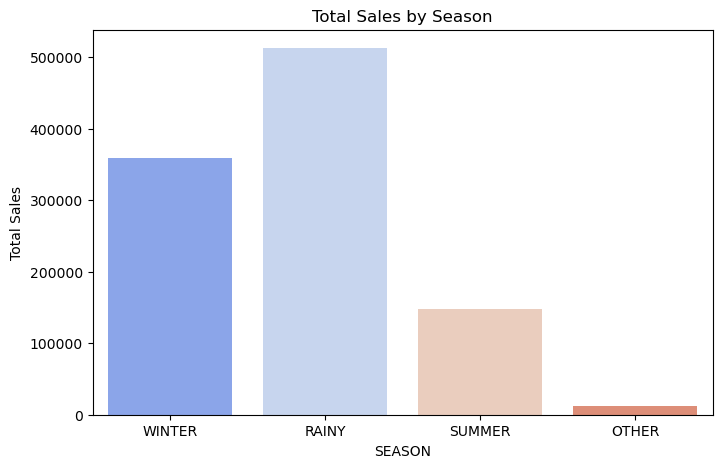

In [29]:
# SALES BY SEASON

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='SEASON', y='TOTAL SALES', hue='SEASON', estimator=sum, errorbar=None, palette='coolwarm', legend=False)
plt.title("Total Sales by Season")
plt.ylabel("Total Sales")
plt.show()

⦁	Seasonal sales analysis shows that the Rainy season is the primary revenue driver, while Summer consistently underperforms.  
⦁	Focus inventory, supply chain readiness, and marketing spend on the Rainy and Winter seasons to maximize revenue, while using targeted promotions, dynamic pricing, and product bundling in Summer to lift demand and reduce seasonal revenue dips.

Which product categories drive revenue, and where should the business focus inventory, marketing, and supplier investment?

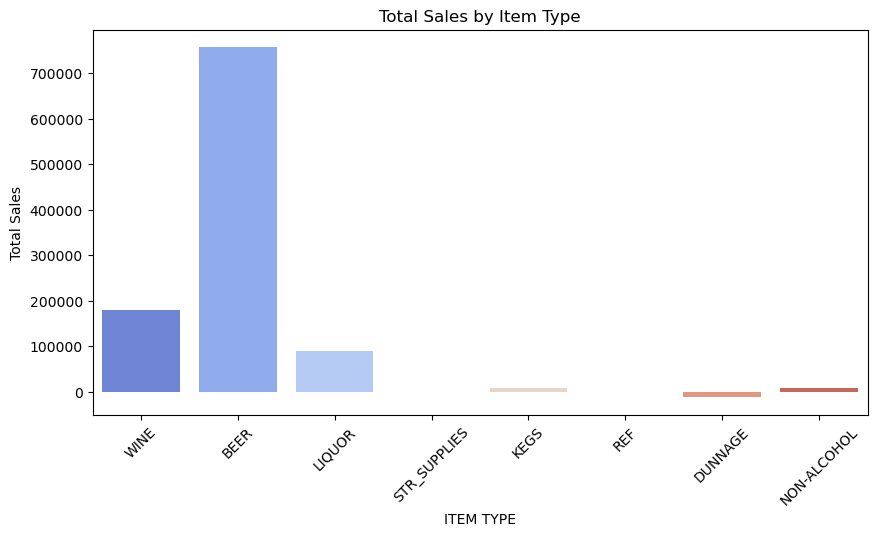

In [30]:
# SALES BY ITEM TYPE

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='ITEM TYPE', y='TOTAL SALES', hue='ITEM TYPE', estimator=sum, errorbar=None, palette='coolwarm', legend=False)
plt.title("Total Sales by Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

⦁	Category-wise sales analysis shows Beer as the primary revenue driver, followed by Wine and Liquor, while other categories contribute minimally.  
⦁	Focus on high-revenue categories like Beer and Wine, optimize Liquor for profitability, and reduce or bundle low-performing items to improve inventory efficiency and overall revenue.

Which suppliers are most critical to our revenue, and how dependent is the business on them?

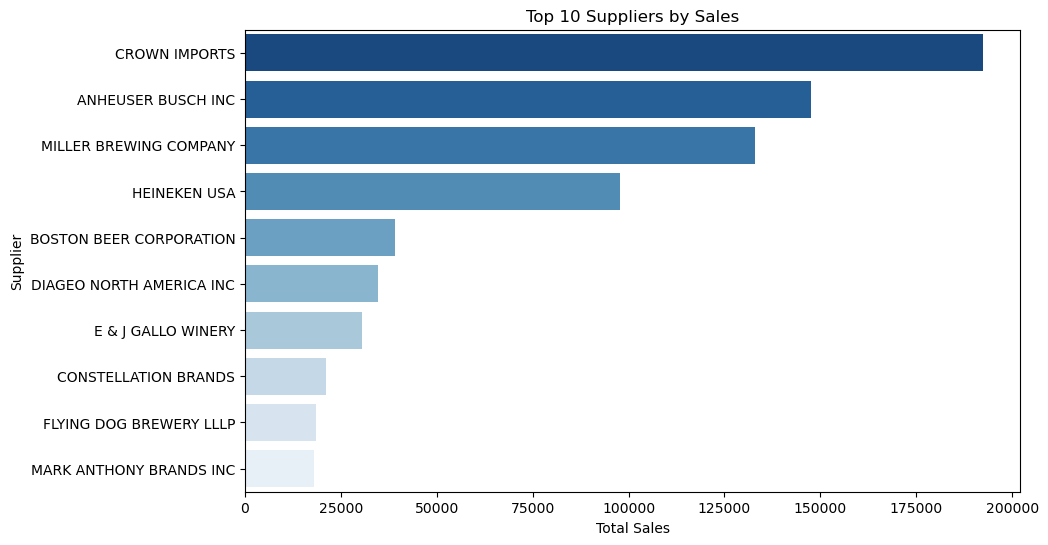

In [31]:
# TOP 10 SUPPLIERS BY TOTAL SALES

top_suppliers = df.groupby('SUPPLIER')['TOTAL SALES'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_suppliers.values,y=top_suppliers.index, hue=top_suppliers.index, palette="Blues_r")
plt.title("Top 10 Suppliers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Supplier")
plt.show()

⦁	The chart highlights a strong concentration of sales among a few top suppliers, with a clear gap between the leading suppliers and the rest, creating dependency risk.  
⦁	Strengthening strategic partnerships with top suppliers while developing mid-tier vendors will ensure revenue stability and supply chain resilience.

Which individual products contribute the most to total revenue, and where should the business focus inventory, promotions, and supply planning?

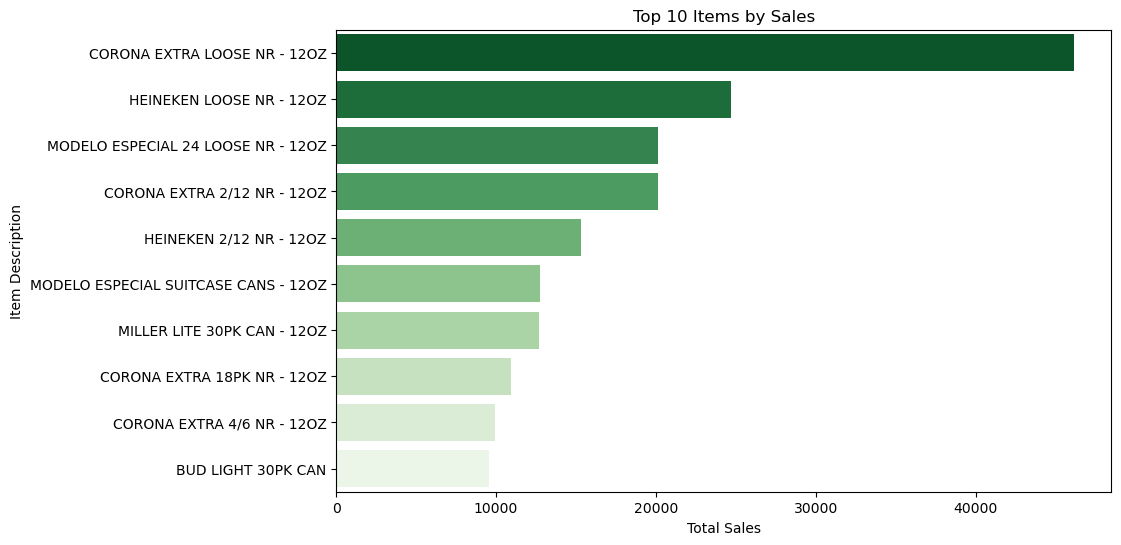

In [32]:
# TOP 10 ITEMS BY TOTAL SALES

top_items = df.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index, hue=top_items.index, palette="Greens_r")
plt.title("Top 10 Items by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Item Description")
plt.show()

⦁	The chart shows that a small number of high-performing beer SKUs dominate total sales, creating a long-tail pattern across the remaining products.  
⦁	Prioritize inventory availability and promotions for top-performing SKUs while developing targeted strategies to improve mid-tier product sales and reduce dependency risk.




Which seasons contribute the most to total revenue, and how dependent is the business on specific seasons?

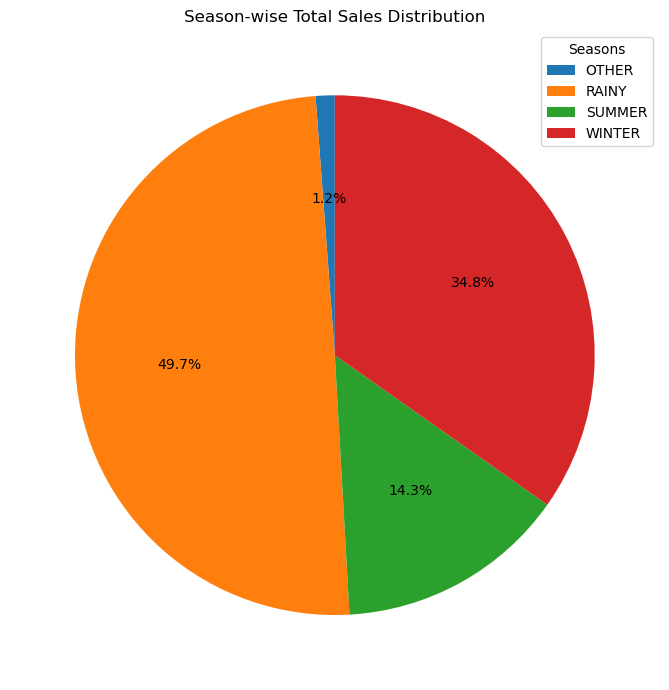

In [33]:
# PIE-CHART -> SEASONAL SALE

season_sales = df.groupby('SEASON')['TOTAL SALES'].sum()
plt.figure(figsize=(7,7))
plt.pie(season_sales.values, labels=None, autopct='%1.1f%%', startangle=90)
plt.legend(season_sales.index, title="Seasons", loc="best")
plt.title("Season-wise Total Sales Distribution")
plt.tight_layout()
plt.show()

⦁	Sales are heavily concentrated in the Rainy season (50%), followed by Winter (35%), while Summer contributes significantly less and Other seasons are negligible.  
⦁	Focus inventory and marketing efforts on Rainy and Winter seasons while using targeted promotions and product bundling to improve Summer sales and reduce seasonal dependency.

In [35]:
df.to_csv("final_sales_dataset_for_powerbi.csv", index=False)